Streaming output truncated to the last 5000 lines.
4
5
6
7
8
[0, 1, 2, 3, 4, 5, 6, 7, 8]
r
None
p
[5, 2, 1, 4, 6, 3, 7, 8, 0]
[4, 3, 6, 5]
[[4, 5], [3, 2], [6, 1], [5, 4]]
finishedtasks
[0, 1, 8, 7, 9, 2]
[1.8, 1.8, 1.8, 1.4, 1.4, 1.4, 1, 1, 1, 17, 10, 12, 19, 0, 0, 0, 0, 0, 0]
action
[[4, 5], [3, 2], [6, 1], [5, 4]]
finisht
[0, 1, 8, 7, 9, 2, 4]
done
False
running loop
0
1
2
3
4
5
6
7
8
[0, 1, 2, 3, 4, 5, 6, 7, 8]
r
None
p
[3, 5, 8, 2, 4, 6, 1, 7, 0]
[3, 5, 6]
[[3, 3], [5, 5], [6, 8]]
finishedtasks
[0, 1, 8, 7, 9, 2, 4]
[1.8, 1.8, 1.8, 1.4, 1.4, 1.4, 1, 1, 1, 17, 12, 19, 0, 0, 0, 0, 0, 0, 0]
action
[[3, 3], [5, 5], [6, 8]]
finisht
[0, 1, 8, 7, 9, 2, 4, 3]
done
False
running loop
0
1
2
3
4
5
6
7
8
[0, 1, 2, 3, 4, 5, 6, 7, 8]
r
None
p
[8, 5, 1, 0, 3, 4, 6, 7, 2]
[6, 5]
[[6, 8], [5, 5]]
finishedtasks
[0, 1, 8, 7, 9, 2, 4, 3]
[1.8, 1.8, 1.8, 1.4, 1.4, 1.4, 1, 1, 1, 12, 19, 0, 0, 0, 0, 0, 0, 0, 0]
action
[[6, 8], [5, 5]]
finisht
[0, 1, 8, 7, 9, 2, 4, 3, 6]
done
False
running loop
0
1
2
3
4

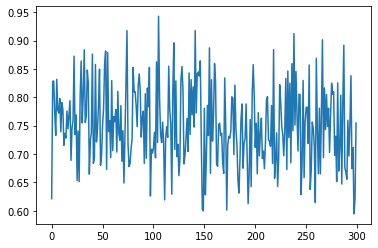

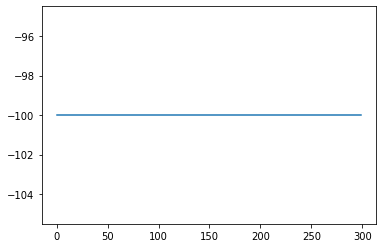

In [14]:
import numpy as np
import random
#import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() 
import math
from matplotlib import pyplot as plt
class Environment:

    def __init__(self, taskCount=10, save = False):
        self.taskCount = taskCount
        self.workflow  = Workflow(taskCount)
        self.workflowbak = self.workflow
        self.runningTasks  = []
        self.finishedTasks = []
        self.currentTime = 0
        self.resourcePool = []
        self.initVM()
        self.finishedSize = 0
        self.totalSize    = sum(self.workflow.taskSize)
        if save:
            dbfile = open('env-'+str(self.taskCount), 'wb')
            pickle.dump(self, dbfile)
            dbfile.close()

    def saveWorkflow(self):
        dbfile = open('env-' + str(self.taskCount), 'wb')
        pickle.dump(self, dbfile)
        dbfile.close()

    def getCurrentCost(self):
        cost = 0
        for vm in self.resourcePool:
            cost += vm.totalCost
        return cost

    def initVM(self):
        vm_large_1 = VM(speed=1.8, cost=2.3, type='large')
        vm_large_2 = VM(speed=1.8, cost=2.3, type='large')
        vm_large_3 = VM(speed=1.8, cost=2.3, type='large')

        vm_medium_1 = VM(speed=1.4, cost=1.7, type='medium')
        vm_medium_2 = VM(speed=1.4, cost=1.7, type='medium')
        vm_medium_3 = VM(speed=1.4, cost=1.7, type='medium')

        vm_small_1 = VM(speed=1, cost=1, type='small')
        vm_small_2 = VM(speed=1, cost=1, type='small')
        vm_small_3 = VM(speed=1, cost=1, type='small')

        self.resourcePool.append(vm_large_1)
        self.resourcePool.append(vm_large_2)
        self.resourcePool.append(vm_large_3)

        self.resourcePool.append(vm_medium_1)
        self.resourcePool.append(vm_medium_2)
        self.resourcePool.append(vm_medium_3)

        self.resourcePool.append(vm_small_1)
        self.resourcePool.append(vm_small_2)
        self.resourcePool.append(vm_small_3)

    def getFinishRate(self):
        return self.finishedSize / self.totalSize

    def timeProcess(self):
        self.currentTime += 0.1
        self.finishedSize=0
        p=False
        for i in range(len(self.resourcePool)):
          self.finishedSize+=self.resourcePool[i].finished_size()

        for i in range(len(self.resourcePool)):
            finishSig = self.resourcePool[i].timeProcess()
            
            if finishSig:
                p=True
                self.setTaskFinished(self.resourcePool[i].taskNo)
                self.resourcePool[i].reset()
        return p

    '''def step(self, taskNo, vmNo):

        # vmNo == 1 means hold
        if vmNo != -1:
            if self.resourcePool[vmNo] <= 0:
                # print("调度任务:", taskNo, " 至VM: ", vmNo)
                self.scheduleTask(taskNo, vmNo)
            else:
                pass
                # print("=== error index")
        else:
            pass
            # print("=== hold")

        ob = self.getObservation()
        while(self.timeProcess()==False);
        reward = self.getFinishRate()
        return self.isDone(), ob, reward'''

    def step(self,action):
      done =False
      
      for ac in action:
        taskNo=ac[0]
        vmNo=ac[1]
        if ac[1]!=-1:
          if self.resourcePool[vmNo].taskNo == -1:
            self.scheduleTask(taskNo,vmNo)
          else:
            pass
        else:
          pass
        while (self.timeProcess()==False):
          {
              
          } 
        print("finisht")
        print(self.finishedTasks)
        nextstate=[]
        rp=[]
        r=[]
        taskToSchedule=[]
        reward = self.getFinishRate()
        if(len(self.finishedTasks)==10):
          done=True
          print("done",done)
          return nextstate, reward,done, r,taskToSchedule
        
        
        taskToSchedule = self.getNewTasks()
        while(len(taskToSchedule)==0):
          m=self.timeProcess()
          taskToSchedule = self.getNewTasks()
        
        for i in range(len(self.resourcePool)):

          if self.resourcePool[vmNo].taskNo == -1:
            rp.append(self.resourcePool[vmNo].speed)
            r.append(i)
          else:
            rp.append(0)
        nextstate.extend(rp)

        ts=[]
        for t in taskToSchedule:
          ts.append(self.workflow.taskSize[t])
        while(len(ts)<self.taskCount):
          {
              ts.append(0)
          }

        nextstate.extend(ts)


        reward = self.getFinishRate()
        return nextstate, reward,done, r,taskToSchedule
    
    def getaction(self,r,taskToSchedule):
      state=[]
      rr=[]
      ts=[]
      for i in r:
        print (i)
        rr.append(self.resourcePool[i].speed)
      j=0
      while(len(rr)<9):
        rr.append(0)
        #j=j+1

      for t in taskToSchedule:
          ts.append(self.workflow.taskSize[t])
      while(len(ts)<self.taskCount):
        {
          ts.append(0)
        }

      state.extend(rr)
      state.extend(ts)

      print (r)
      p=r
      r=random.shuffle(r)
      print ("r")
      print (r)
      print ("p")
      print (p)
      q=taskToSchedule
      taskToSchedule=random.shuffle(taskToSchedule)
      action=[]
      print(q)
      if(p is not None and q is not None):
        
        if(len(p) <len(q)):
          for i in range(len(p)):
            action.append([q[i],p[i]])
            print (i)
        else:
          for i in range(len(q)):
            action.append([q[i],p[i]])
        
      print (action)
      print("finishedtasks")
      print(self.finishedTasks)
      return state,action



    def getNewTasks(self):
        pre_tasks = self.workflow.getNewTask()
        tasksToSchedule = list(set(pre_tasks) - set(self.runningTasks) - set(self.finishedTasks))
        if len(tasksToSchedule) > 0:
            tasksToSchedule.sort()
        return tasksToSchedule

    def scheduleTask(self, taskNo, vmNo):
        if self.resourcePool[vmNo].taskNo != -1:
            return 'vm_'+str(vmNo)+' currently unavailable'
        self.runningTasks.append(taskNo)
        self.resourcePool[vmNo].assignTask(taskNo, self.workflow.taskSize[taskNo])
        return 'schedule task t_'+str(taskNo)+' to vm_'+str(vmNo)

    def setTaskFinished(self, taskNo):
        self.workflow.markAsFinished(taskNo)
        self.runningTasks.remove(taskNo)
        self.finishedTasks.append(taskNo)

    def isDone(self):
        if len(self.finishedTasks) == self.workflow.taskCount:
            return True
        return False

    def reset(self):
        self.workflow = self.workflowbak
        self.runningTasks = []
        self.finishedTasks = []
        self.currentTime = 0
        self.resourcePool = []
        self.initVM()
        self.finishedSize = 0
        self.totalSize = sum(self.workflow.taskSize)

class Workflow:

    def __init__(self, taskCount):
        self.taskCount = taskCount
        self.DAG = np.zeros((taskCount, taskCount), dtype=int)
        self.taskSize = self.generateTaskSizeRandom()
        self.randomGenerate()

    def markAsFinished(self, taskNo):
        self.DAG[taskNo, :] = 0

    def getNewTask(self):
        newTasks = []
        for i in range(self.taskCount):
            # 判断一个任务是否可以开始（是否有前驱节点）
            flag = True
            for e in self.DAG[:,i]:
                if e != 0:
                    flag = False
            if flag:
                newTasks.append(i)

        return newTasks

    def randomGenerate(self):
        for i in range(0, self.taskCount-1):
            edge = random.randint(i + 1, self.taskCount - 1)
            self.DAG[i, edge] = 1


        for i in range(1, self.taskCount-1):
            flag = True
            for e in self.DAG[:,i]:
                if e != 0:
                    flag = False
                    break

            if flag:
                edge = random.randint(0, i - 1)
                self.DAG[edge, i] = 1

        for i in range(0, self.taskCount-1):
            for j in range(i+1, self.taskCount-1):
                if random.randint(0, 10) > 99:
                    self.DAG[i,j] = 1

    def print(self):
        print(self.DAG)
        print(self.taskSize)


    def generateTaskSizeRandom(self):
        tasksize = []
        for i in range(self.taskCount):
            if random.randint(0, 10) > 6:
                tasksize.append(random.randint(10, 19))
            else:
                tasksize.append(random.randint(1, 10))
        return tasksize

class VM:
    def __init__(self, speed = 1, cost = 1, timeStep = 0.1, type='default'):
        self.taskNo     = -1
        self.taskSize   = 0
        self.finished_Size =0
        self.remainTime = 0
        self.speed      = speed
        self.cost       = cost
        self.totalCost  = 0
        self.timeStep   = timeStep
        self.type       = type

    def assignTask(self, taskNo, taskSize):
        self.taskNo = taskNo
        self.taskSize = taskSize / self.speed
        self.remainTime = taskSize / self.speed

    def reset(self):
        self.taskNo     = -1
        self.taskSize   = 0
        self.remainTime = 0
        self.finished_Size=0
    
    def finished_size(self):
      
        self.finished_Size=self.taskSize-(self.remainTime*self.speed)
        return self.finished_Size

    def timeProcess(self):
        finishSingal = False
        if self.remainTime > 0:
            self.remainTime -= (self.speed * self.timeStep)
            self.totalCost  += (self.cost * self.timeStep)
            if self.remainTime <= 0:
                finishSingal = True
        return finishSingal

def getAction(env):
    taskToSchedule = env.getNewTasks()
    taskNo = -1
    vmNo   = -1

    if len(taskToSchedule) == 0:
        return taskNo, vmNo
    # elif len(taskToSchedule) > 0:
    #    multi = True

    taskNo = taskToSchedule[0]

    for i in range(len(env.resourcePool)):
        if env.resourcePool[i] == 0:
            vmNo = i

    return taskNo, vmNo

class Model:
    def __init__(self, num_states, num_actions, batch_size):
        self._num_states = num_states
        self._num_actions = num_actions+1
        self._batch_size = batch_size
        # define the placeholders
        self._states = None
        self._actions = None
        # the output operations
        self._logits = None
        self._optimizer = None
        self._var_init = None
        # now setup the model
        self._define_model()

    def _define_model(self):
        self._states = tf.placeholder(shape=[None, self._num_states], dtype=tf.float32)
        #self._states = tf.placeholder(shape=[None, no_of_Vms+no_of_tasks], dtype=tf.float32)
        self._q_s_a = tf.placeholder(shape=[None, self._num_actions], dtype=tf.float32)
        #self._q_s_a = tf.placeholder(shape=[None, no_of_Vms], dtype=tf.float32)
        # create a couple of fully connected hidden layers
        fc1 = tf.layers.dense(self._states, 50, activation=tf.nn.relu)
        fc2 = tf.layers.dense(fc1, 50, activation=tf.nn.relu)
        self._logits = tf.layers.dense(fc2, self._num_actions)
        loss = tf.losses.mean_squared_error(self._q_s_a, self._logits)
        self._optimizer = tf.train.AdamOptimizer().minimize(loss)
        self._var_init = tf.global_variables_initializer()
    def predict_one(self, state, sess):
        return sess.run(self._logits, feed_dict={self._states:
                                                    state.reshape(1, self.num_states)})

    def predict_batch(self, states, sess):
        return sess.run(self._logits, feed_dict={self._states: states})

    def train_batch(self, sess, x_batch, y_batch):
        sess.run(self._optimizer, feed_dict={self._states: x_batch, self._q_s_a: y_batch})

class Memory:
    def __init__(self, max_memory):
        self._max_memory = max_memory
        self._samples = []

    def add_sample(self, sample):
        self._samples.append(sample)
        if len(self._samples) > self._max_memory:
            self._samples.pop(0)

    def sample(self, no_samples):
        if no_samples > len(self._samples):
            return random.sample(self._samples, len(self._samples))
        else:
            return random.sample(self._samples, no_samples)

class GameRunner:
    def __init__(self, sess, model, env, memory, max_eps, min_eps,
                 decay, render=True):
        self._sess = sess
        self._env = env
        self.environment=Environment(10)
        self._model = model
        self._memory = memory
        self._render = render
        self._max_eps = max_eps
        self._min_eps = min_eps
        self._decay = decay
        self._eps = self._max_eps
        self._steps = 0
        self._reward_store = []
        self._max_x_store = []

    def run(self):
        #state = self._env.reset()
        r=[0,1,2,3,4,5,6,7,8]
        taskToSchedule=self.environment.getNewTasks()
        tot_reward = 0
        max_x = -100
        while True:
            #if self._render:
                #self._env.render()

            state,action = self.environment.getaction(r,taskToSchedule)
            print(state)
            print("action")
            print (action)
            next_state, reward, done, r,taskToSchedule = self.environment.step(action)
            print("done")
            print(done)
            action_=[0,0,0,0,0,0,0,0,0]
            for i in action:
              action_[i[1]]=i[0]
            '''if next_state[0] >= 0.1:
                reward += 10
            elif next_state[0] >= 0.25:
                reward += 20
            elif next_state[0] >= 0.5:
                reward += 100

            if next_state[0] > max_x:
                max_x = next_state[0]
            # is the game complete? If so, set the next state to
            # None for storage sake'''
            if done==True:
                next_state = None

            self._memory.add_sample((state, action_, reward, next_state))
            self._replay()

            # exponentially decay the eps value
            self._steps += 1
            self._eps = MIN_EPSILON + (MAX_EPSILON - MIN_EPSILON) \
                                      * math.exp(-LAMBDA * self._steps)

            # move the agent to the next state and accumulate the reward
            state = next_state
            tot_reward += reward
            if done==False:
              print("running loop")
            elif done==True:
              print("endloop")

            # if the game is done, break the loop
            if done==True:
                print("endloop")
                self._reward_store.append(tot_reward)
                self._max_x_store.append(max_x)
                self.environment.reset()
                break

        print("Step {}, Total reward: {}, Eps: {}".format(self._steps, tot_reward, self._eps))




    def _replay(self):
        batch = self._memory.sample(self._model._batch_size)
        states = np.array([val[0] for val in batch])
        next_states = np.array([(np.zeros(self._model._num_states)
                                if val[3] is None else val[3]) for val in batch])
        # predict Q(s,a) given the batch of states
        q_s_a = self._model.predict_batch(states, self._sess)
        # predict Q(s',a') - so that we can do gamma * max(Q(s'a')) below
        q_s_a_d = self._model.predict_batch(next_states, self._sess)
        # setup training arrays
        x = np.zeros((len(batch), self._model._num_states))
        y = np.zeros((len(batch), self._model._num_actions))
        for i, b in enumerate(batch):
            state, action, reward, next_state = b[0], b[1], b[2], b[3]
            # get the current q values for all actions in state
            current_q = q_s_a[i]
            # update the q value for action
            if next_state is None:
                # in this case, the game completed after action, so there is no max Q(s',a')
                # prediction possible
                #current_q[action] = reward
                current_q[-1] = reward
            else:
                current_q[-1] = reward + GAMMA * np.amax(q_s_a_d[i])
            x[i] = state
            y[i] = current_q
        self._model.train_batch(self._sess, x, y)

def _choose_action(self, state):
    if random.random() < self._eps:
        return random.randint(0, self._model._num_actions - 1)
    else:
        return np.argmax(self._model.predict_one(state, self._sess))


if __name__ == "__main__":
    #env_name = 'MountainCar-v0'
    #env = gym.make(env_name)
    env=Workflow(10)

    #num_states = env.env.observation_space.shape[0]
    #num_actions = env.env.action_space.n
    num_states=9+10
    num_actions=9
    BATCH_SIZE=5
    MAX_EPSILON = 1
    MIN_EPSILON = 0.01
    LAMBDA = 0.0005
    GAMMA = 0.95
    BATCH_SIZE = 32
    TAU = 0.08
    #RANDOM_REWARD_STD = 1.0
    #env = gym.make("CartPole-v0")
    state_size = 4
    

    model = Model(num_states, num_actions, BATCH_SIZE)
    mem = Memory(50000)

    with tf.Session() as sess:
        sess.run(model._var_init)
        gr = GameRunner(sess, model, env, mem, MAX_EPSILON, MIN_EPSILON,
                        LAMBDA)
        num_episodes = 300
        cnt = 0
        while cnt < num_episodes:
            if cnt % 100 == 0:
              print('Episode {} of {}'.format(cnt+1, num_episodes))
            gr.run()
            cnt += 1
        plt.plot(gr._reward_store)
        plt.show()
        plt.close("all")
        plt.plot(gr._max_x_store)
        plt.show()